# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

Utilize your unsupervised learning skills to reduce dimensionality and identify clusters in the penguins dataset!

Begin by reading in "data/penguins.csv" as a pandas DataFrame called penguins_df, then investigate and clean the dataset by removing the null values and outliers. Save as a cleaned DataFrame called penguins_clean. \

Pre-process the cleaned data using standard scaling and the one-hot encoding to add dummy variables: \
Create the dummy variables and remove the original categorical feature from the dataset. \
Scale the data using the standard scaling method. \
Save the updated data as a new DataFrame called penguins_preprocessed. \

Perform Principal Component Analysis (PCA) on the penguins_preprocessed dataset to determine the desired number of components, considering any component with an explained variance ratio above 10% as a suitable component. Save the number of components as a variable called n_components. \
Finally, execute PCA using n_components and store the result as penguins_PCA. \

Employ k-means clustering on the penguins_PCA dataset, setting random_state=42, to determine the number of clusters through elbow analysis. Save the optimal number of clusters in a variable called n_cluster.

Create and fit a new k-means cluster model, setting n_cluster equal to your n_cluster variable, saving the model as a variable called kmeans. \
Visualize your clusters using the first two principle components.

Add the label column extracted from the k-means clustering (using kmeans.labels_) to the penguins_clean DataFrame.

Create a statistical table by grouping penguins_clean based on the "label" column and calculating the mean of each numeric column. Save this table as stat_penguins.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


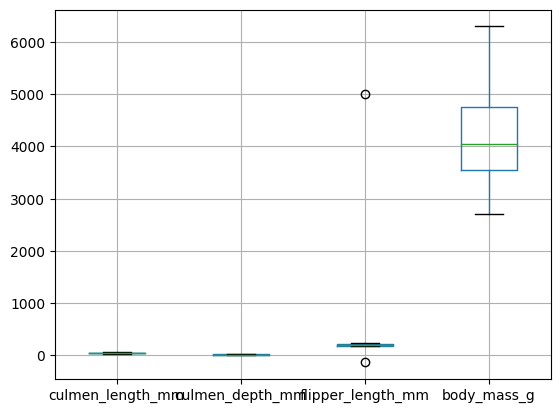

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.6+ KB


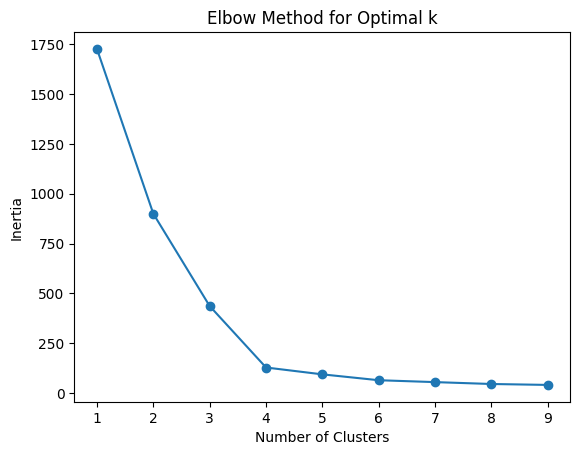

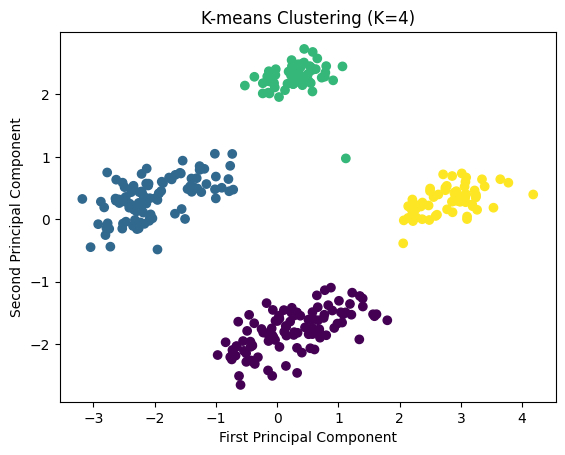

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
cluster,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984


In [59]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.info()
penguins_df.head()


penguins_df.boxplot()
plt.show()
penguins_df.describe()

penguins_clean = penguins_df.dropna()
penguins_clean = penguins_clean[(penguins_clean.flipper_length_mm < 4000) & (penguins_clean.flipper_length_mm>0)]
penguins_clean.info()
penguins_clean.describe()


df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df

scaler = StandardScaler()
scaled = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data = scaled, columns = df.columns)
penguins_preprocessed.head()


pca = PCA()
df_pca = pca.fit(penguins_preprocessed)

Explainability = [*zip(penguins_preprocessed.columns, df_pca.explained_variance_ratio_)]
Explainability

n_components = sum(df_pca.explained_variance_ratio_ > 0.1) # will be 2, just culmen length and depth
pca = PCA(n_components = n_components)
penguins_PCA  = pca.fit_transform(penguins_preprocessed)


clusters = [KMeans(n_clusters=n, random_state=0).fit(penguins_PCA ).inertia_ for n in range(1, 10)]
plt.plot(range(1, 10), clusters, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
n_clusters = 4


kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA )
plt.scatter(penguins_PCA [:, 0], penguins_PCA [:, 1], c=kmeans.labels_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()


penguins_clean['cluster'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','cluster']
stat_penguins = penguins_clean[numeric_columns].groupby('cluster').mean()
stat_penguins